# Youth Unemployment Rate for Germany

This Dataset is not directly related to my Main Achievement of this Course. But i want to display the Youth Unemployment Rate evolution during Covid in the last Years. 

Source: Nasdaq Data Link https://data.nasdaq.com/data/FRED/SLUEM1524ZSDEU-youth-unemployment-rate-for-germany

This script contains the following:

1. Importing libraries and data
2. Subsetting, wrangling, and cleaning time-series data
3. Time series analysis: decomposition
4. Testing for stationarity
5. Stationarizing the Youth Unemployment Rate Data 

# 1. Importing libraries and Data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [2]:
# Configure API key 

quandl.ApiConfig.api_key = 'MFFUhzQxTtQvGumjm1SK'

In [3]:
# Importing the Youth Unemployment Rate Data for Germany" variable.

data = quandl.get('FRED/SLUEM1524ZSDEU')

# 2. Subsetting, wrangling, and cleaning time-series data

In [4]:
data.head()

,Value
Date,
1991-01-01,5.513
1992-01-01,5.970
1993-01-01,7.671
1994-01-01,8.963
1995-01-01,8.466


In [5]:
data.shape

(30, 1)

In [6]:
data.columns

Index(['Value'], dtype='object')

In [7]:
type(data)

pandas.core.frame.DataFrame

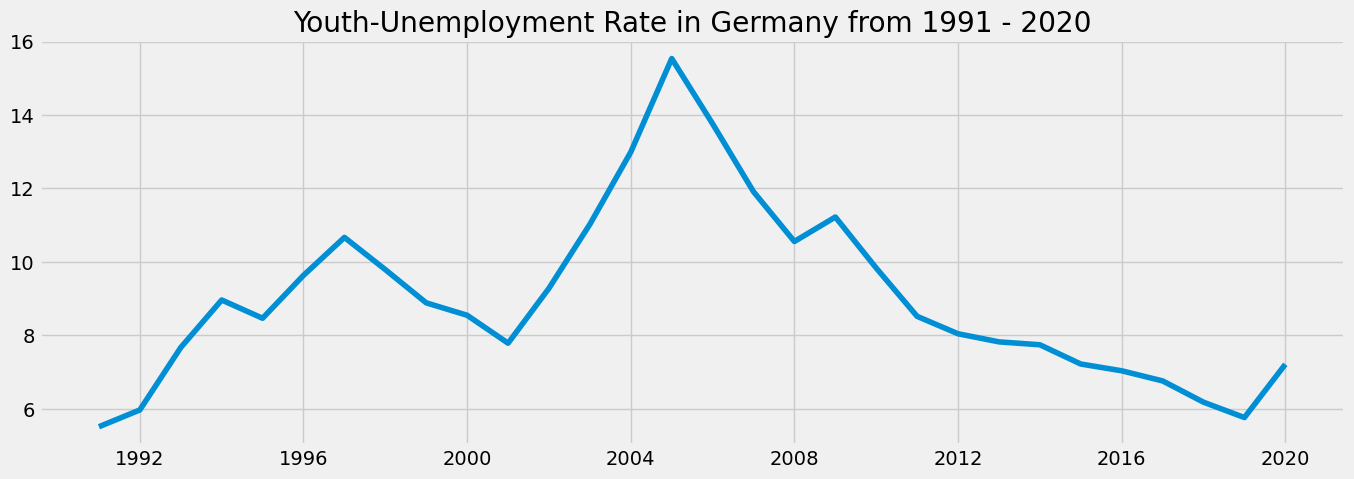

In [8]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. 
# When it's set to 100, it will produce lower-than-standard quality, which is useful if, similar to this notebook, 
# you'll have a lot of plots. A large number of plots will increase the size of the notebook, 
# which could take more time to load and eat up a lot of RAM!
plt.title('Youth-Unemployment Rate in Germany from 1991 - 2020')
plt.plot(data)

In [9]:
# missing values

data.isnull().sum()

Value    0
dtype: int64

In [10]:
# duplicates check

dups = data.duplicated()
dups.sum()

0

In [11]:
# Resetting index so that you can use the "Date" column as a filter

data_2= data.reset_index()

In [12]:
data_2.head()

,Date,Value
0,1991-01-01,5.513
1,1992-01-01,5.970
2,1993-01-01,7.671
3,1994-01-01,8.963
4,1995-01-01,8.466


In [13]:
# Producing a subset for data from 2000  until January of 2021.


data_sub = data_2.loc[(data_2['Date'] >= '2000-01-01') & (data_2['Date'] < '2021-01-01')]

In [14]:
data_sub.shape

(21, 2)

In [15]:
data_sub.head()

,Date,Value
9,2000-01-01,8.548
10,2001-01-01,7.787
11,2002-01-01,9.283
12,2003-01-01,11.023
13,2004-01-01,12.988


In [16]:
data_sub.tail()

,Date,Value
25,2016-01-01,7.036
26,2017-01-01,6.760
27,2018-01-01,6.181
28,2019-01-01,5.763
29,2020-01-01,7.212


The Time series only has Data until 01-21 which we use for this exercise

In [17]:
# Setting the "Date" column as the index

from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['Date']) # Create a datetime column from "Date"
data_sub = data_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
data_sub.drop(['Date'], axis=1, inplace=True) # Drop the "Date" column.
data_sub.head()

,Value
datetime,
2000-01-01,8.548
2001-01-01,7.787
2002-01-01,9.283
2003-01-01,11.023
2004-01-01,12.988


Text(0.5, 1.0, 'Youth-Unemployment Rate in Germany from 2000-2021')

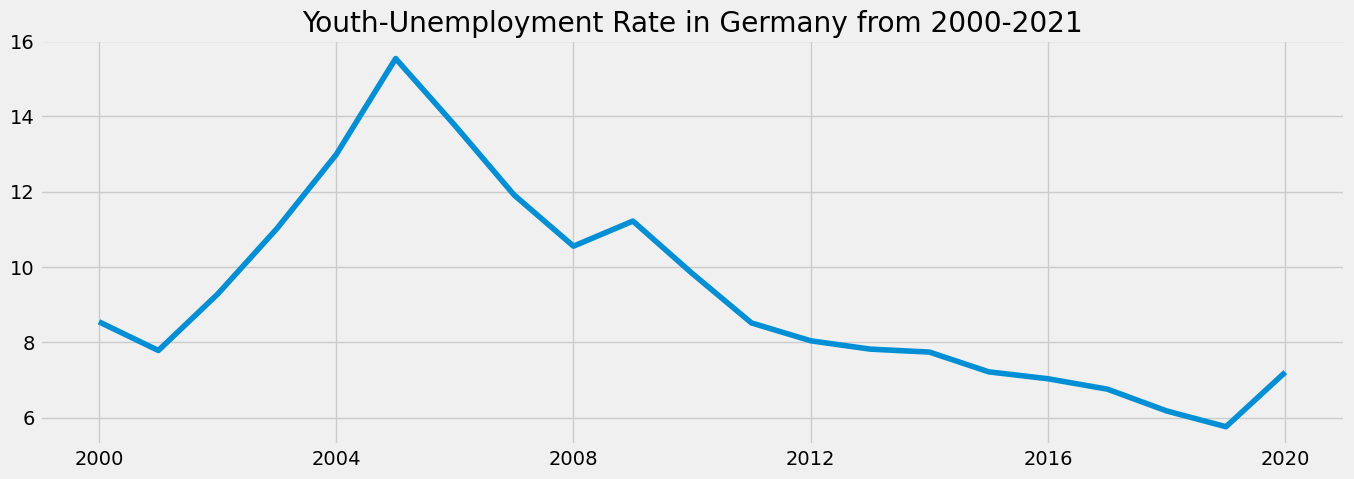

In [18]:
# Plotting the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)
plt.title('Youth-Unemployment Rate in Germany from 2000-2021')

#  3. Time series analysis: decomposition

In [19]:
# Decomposing the time series using an additive model

decomposing = sm.tsa.seasonal_decompose(data_sub, model='additive')

In [20]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

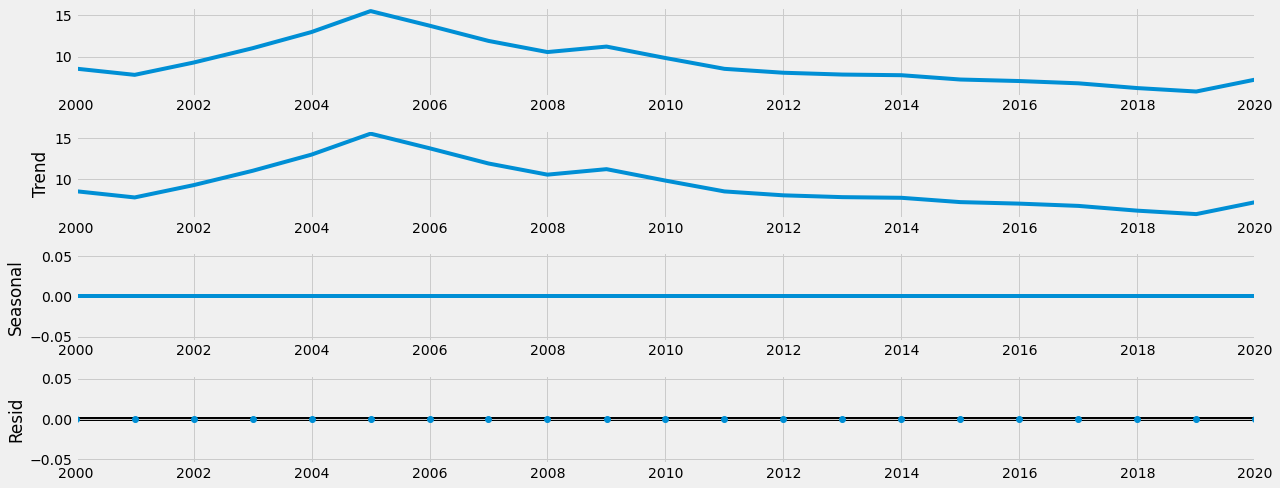

In [21]:
# Plotting the separate components

decomposing.plot()
plt.show()

While there is no seasonal pattern, we can however relate the uprising unemployment starting 2001 until 2005 due to economics in that time, and the starting rize in 2019 is more likely related to the Covid disease. As younger Adults just finishing studies/school are still having trouble to find jobs because of the Restrictions which are just now started to be lifted. Once the Data is updated, i expect the Trend to go downwards again.

# 4. Testing for stationarity

In [22]:
# The adfuller() function will import from the model from statsmodels for the test; however, 
# running it will only return an array of numbers. 
# This is the resaon to define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_sub['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                 -1.179786
p-value                         0.682230
Number of Lags Used             3.000000
Number of Observations Used    17.000000
Critical Value (1%)            -3.889266
Critical Value (5%)            -3.054358
Critical Value (10%)           -2.666984
dtype: float64


In order to determine the results of a statistical hypothesis test, one has to compare the **test statistic** to the **critical value** of the corresponding significance level. 

If the **test statistic** is larger than the **critical value**, one can’t reject the null hypothesis. 
If the **test statistic** is smaller than the **critical value**, the null hypothesis could be rejected. 

In this case, considering a significance level of 5%, the “Critical Value of 5% has a value of -3.054358. This is smaller than the **test statistic**, which is -1.179786, which means that the null hypothesis can be rejected.

This also means that the data is stationary. 

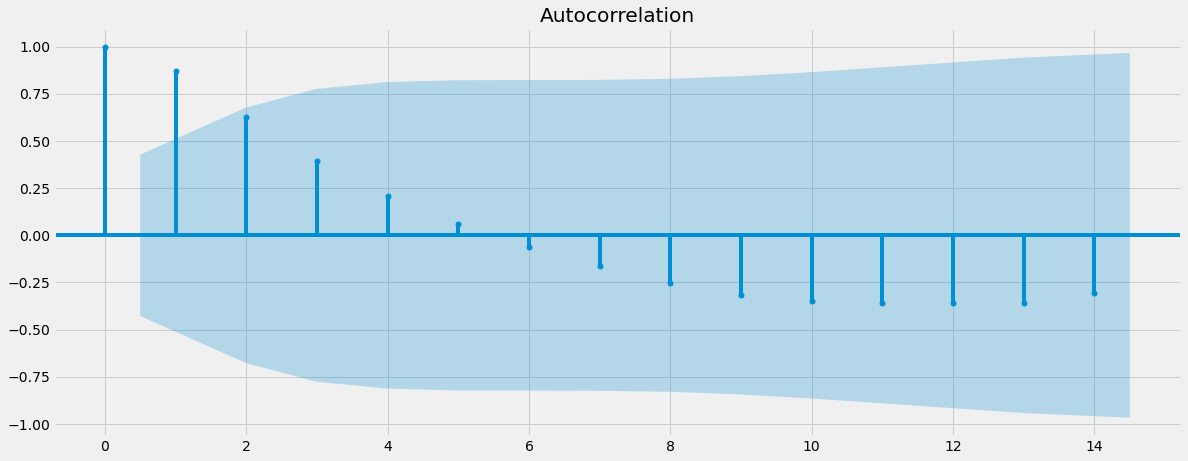

In [23]:
# Checking out autocorrelations with a plot

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Import autocorrelation and partial correlation plots.

plot_acf(data_sub)
plot_pacf
plt.show()

The vertical lines represent the lags in the series, while the blue area represents the confidence interval. When lines go above the blue edge of the confidence interval, this means there are lags that are significantly correlated with each other. As visibly most vertical lines are within the confidence interval, it can be deduced that the data is stationary. From now on and with updated Datainput, we could use this Trends in Time Series to directly see how , for example a covid Disease, Disasters can have effects on the Population and for example the unemployment Rate. This Analysis can be used for every Country we have Data from.